In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-segmentation-tutorial-in-python:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F42674%2F74935%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T094052Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4e3cd13da4939aa351d6d8a81c4a87f780962105d8d18217f7544044a0dcd639a5aecae28271b4282454208e913d716680e485d5e4f3a106a7f4db1739ab6df95675dc3e87af3d8689d1fd5404ae9eb53ecf865009ac2b0f43077a1e9032873eca984497750281a3a99ae6ed61f27f5206b5ea2465929df93c7deac535729972c67ee9b2119ee4d521590a6cf5c69281e4f48da7916eb9fde53bbd25d33b8e8a26daae0a04772bb096655d34fe9ca328fffe848dd4dbed315435b6a2ab0dbbd5057f6ad7bc368e7e26a1d10d3f48f5a22b9967bc17d4ddbc4f2a811a4ea855a999d74cc9534805c362804cdf34b92ce54404ad92e5ed0da389923dac7656c5b6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [ ]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def Encode(data, columns):
    for i in columns:
        label_encode = LabelEncoder()
        lc = label_encode.fit_transform(data[i])
        data[i + '_'] = lc
columns = ['Gender']

In [ ]:
Encode(df, columns)

In [ ]:
df_scaled = df.drop(columns = ['CustomerID', 'Gender'])

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df_scaled.columns)

In [ ]:
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [ ]:
df_cluster = df_scaled

In [ ]:
pca = PCA()
pca.fit(df_cluster)

PCA()

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.57076896, 0.21404941, 0.10928099, 0.10590064])

In [ ]:
cumulative_explained_variance = explained_variance.cumsum()
cumulative_explained_variance

array([0.57076896, 0.78481838, 0.89409936, 1.        ])

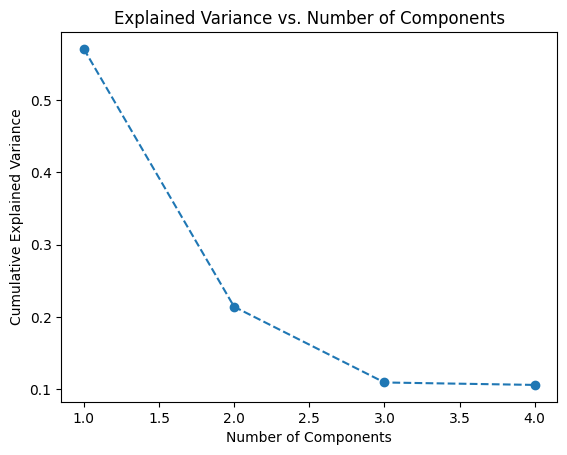

In [ ]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [ ]:
pca_ = PCA(n_components = 3)
pca_features = pca_.fit_transform(df_cluster)

In [ ]:
component_loadings = pca.components_
component_loadings

array([[ 0.05229534,  0.02946581, -0.04906465,  0.99699028],
       [ 0.72547595, -0.02842334, -0.68399818, -0.07087494],
       [-0.68377049,  0.0572586 , -0.72744534, -0.0016259 ],
       [ 0.05837606,  0.99751959,  0.02371555, -0.03137636]])

In [ ]:
pca_df = pd.DataFrame(pca_features)
pca_df.head()

,0,1,2
0,0.532955,-0.227841,0.321860
1,0.513939,-0.493080,-0.016202
2,-0.446266,0.087079,0.555761
3,-0.478796,-0.366617,-0.010714
4,-0.451984,0.003006,0.159208


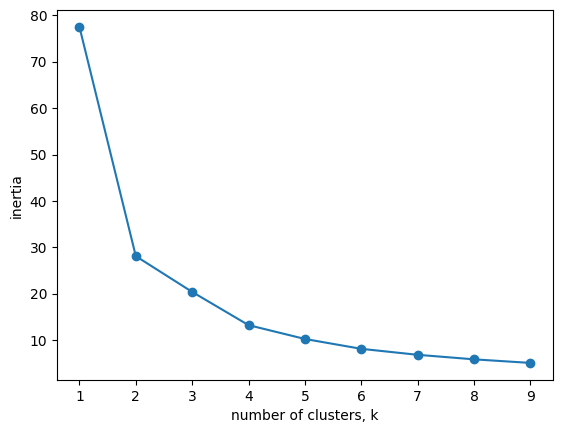

In [ ]:
range_ = range(1, 10)
inertias = []

for k in range_:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)

    # Fit model to samples
    model.fit(pca_df)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(range_, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range_)
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)

In [ ]:
labels = model.fit_predict(pca_df)

In [ ]:
pca_df['Cluster'] = labels

In [ ]:
pca_df

,0,1,2,Cluster
0,0.532955,-0.227841,0.321860,0
1,0.513939,-0.493080,-0.016202,0
2,-0.446266,0.087079,0.555761,1
3,-0.478796,-0.366617,-0.010714,3
4,-0.451984,0.003006,0.159208,3
...,...,...,...,...
195,-0.442610,-0.237388,-0.134542,3
196,-0.405571,0.256687,0.115348,1
197,0.555315,-0.316617,-0.056789,0
198,0.586009,0.071676,0.364057,2


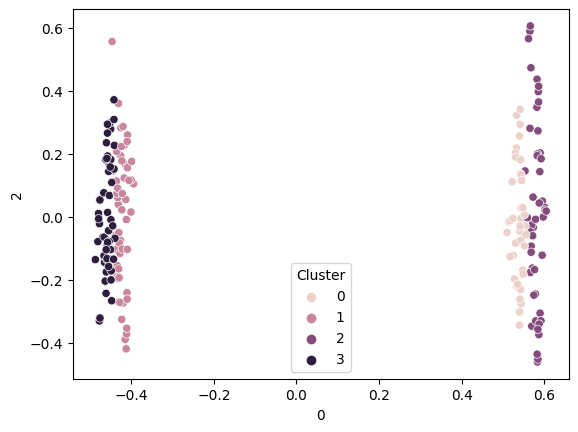

In [ ]:
sns.scatterplot(data = pca_df, x = 0, y = 2, hue = 'Cluster')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x=0, y=1, z=2,
              color=pca_df['Cluster'])
fig.show()

In [ ]:
df['cluster'] = labels

In [ ]:
result_df = df.drop(columns = ['CustomerID', 'Gender'])

In [ ]:
summary = {}

for index in range(4):
    summary[index] = result_df[result_df['cluster'] == index].describe().T

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Age,40.0,28.250,6.975231,18.0,21.75,28.0,33.25,40.0
Annual Income (k$),40.0,62.000,29.117798,15.0,41.00,63.0,78.00,137.0
Spending Score (1-100),40.0,71.675,16.727664,39.0,58.25,73.0,88.50,97.0
Gender_,40.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0
cluster,40.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


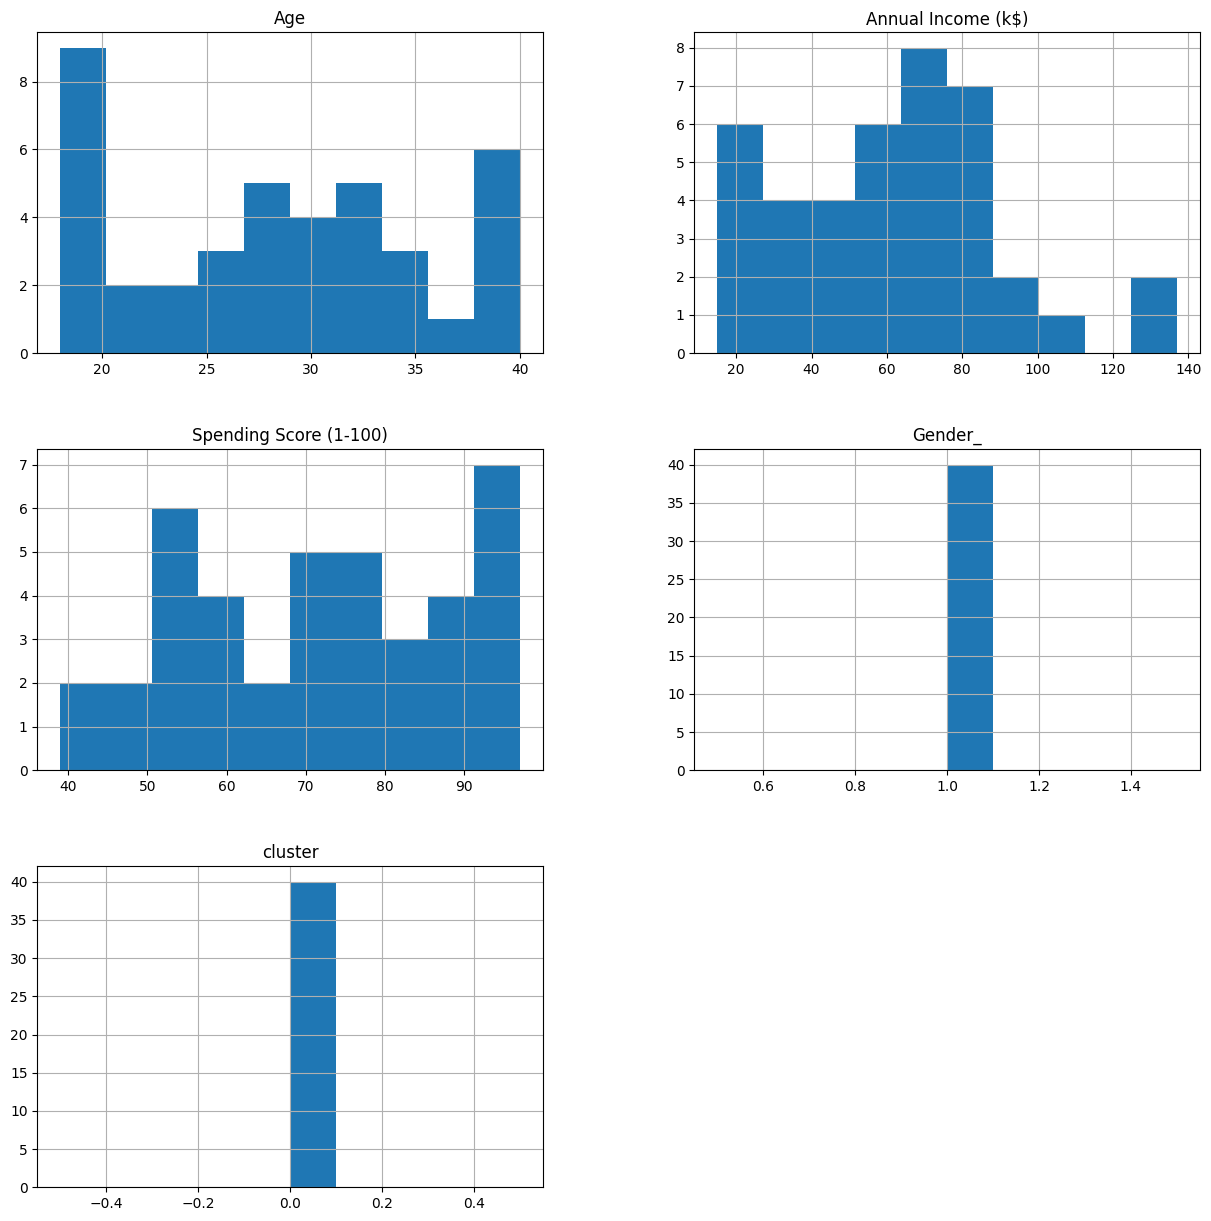

In [ ]:
result_df[result_df['cluster'] == 0].hist(figsize = (15,15));

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Age,55.0,48.109091,9.836954,20.0,41.5,49.0,54.0,68.0
Annual Income (k$),55.0,58.818182,25.771856,16.0,41.0,57.0,74.0,126.0
Spending Score (1-100),55.0,34.781818,16.465104,5.0,21.0,39.0,48.5,59.0
Gender_,55.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cluster,55.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


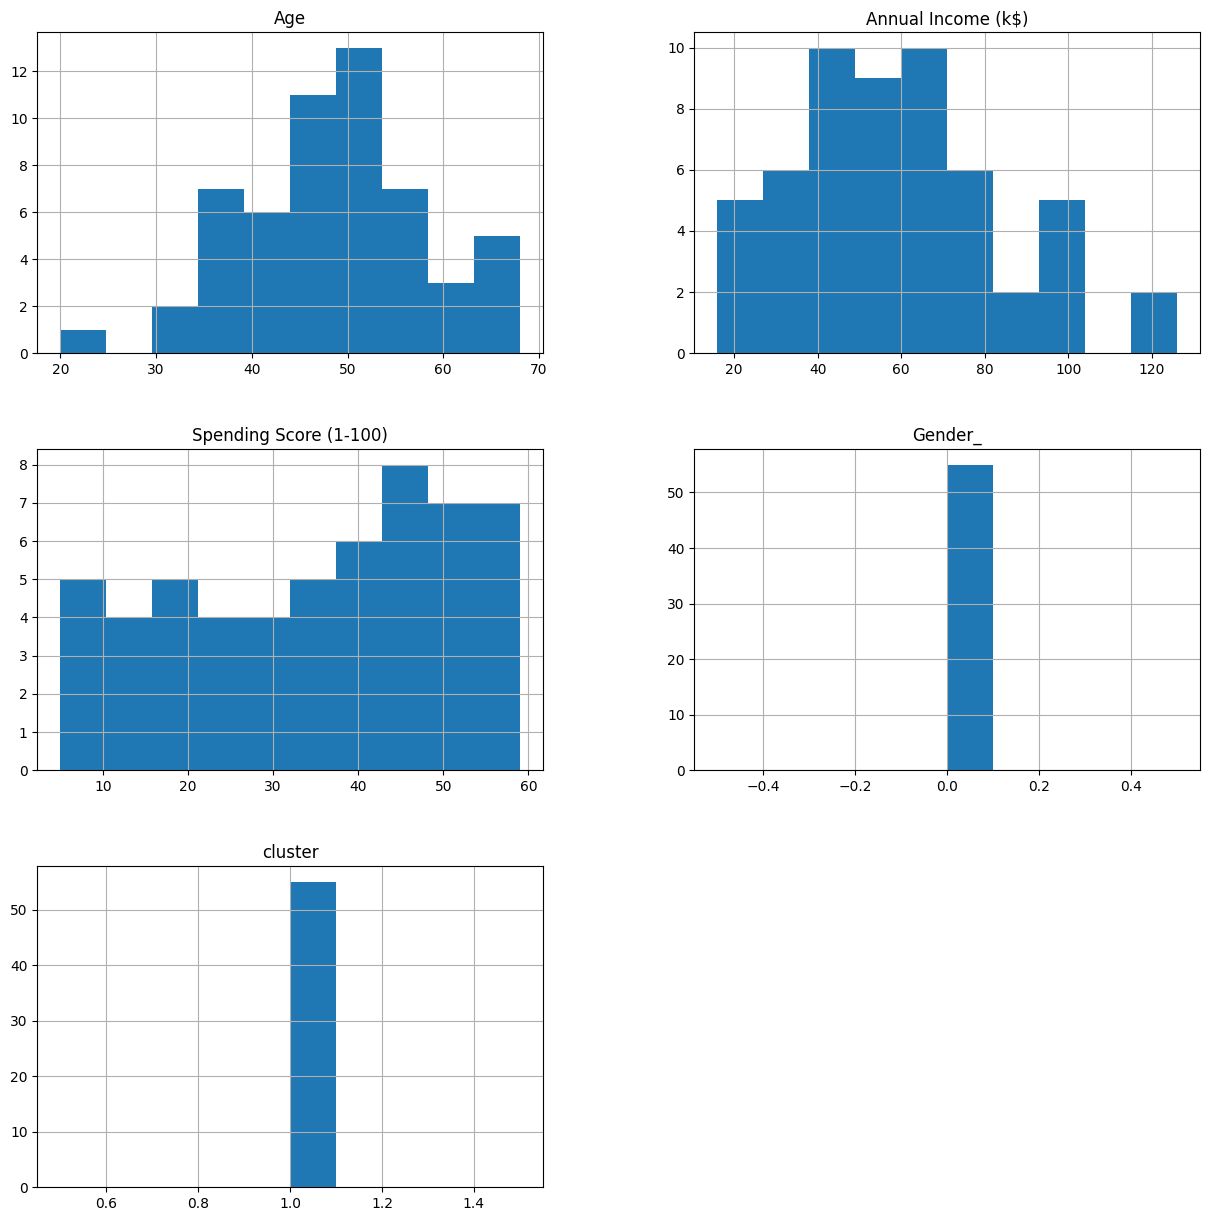

In [ ]:
result_df[result_df['cluster'] == 1].hist(figsize = (15,15));

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Age,48.0,49.437500,14.028703,19.0,40.00,48.5,59.25,70.0
Annual Income (k$),48.0,62.416667,24.696311,19.0,46.00,62.5,78.00,137.0
Spending Score (1-100),48.0,29.208333,19.266284,1.0,11.75,32.0,46.25,60.0
Gender_,48.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
cluster,48.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


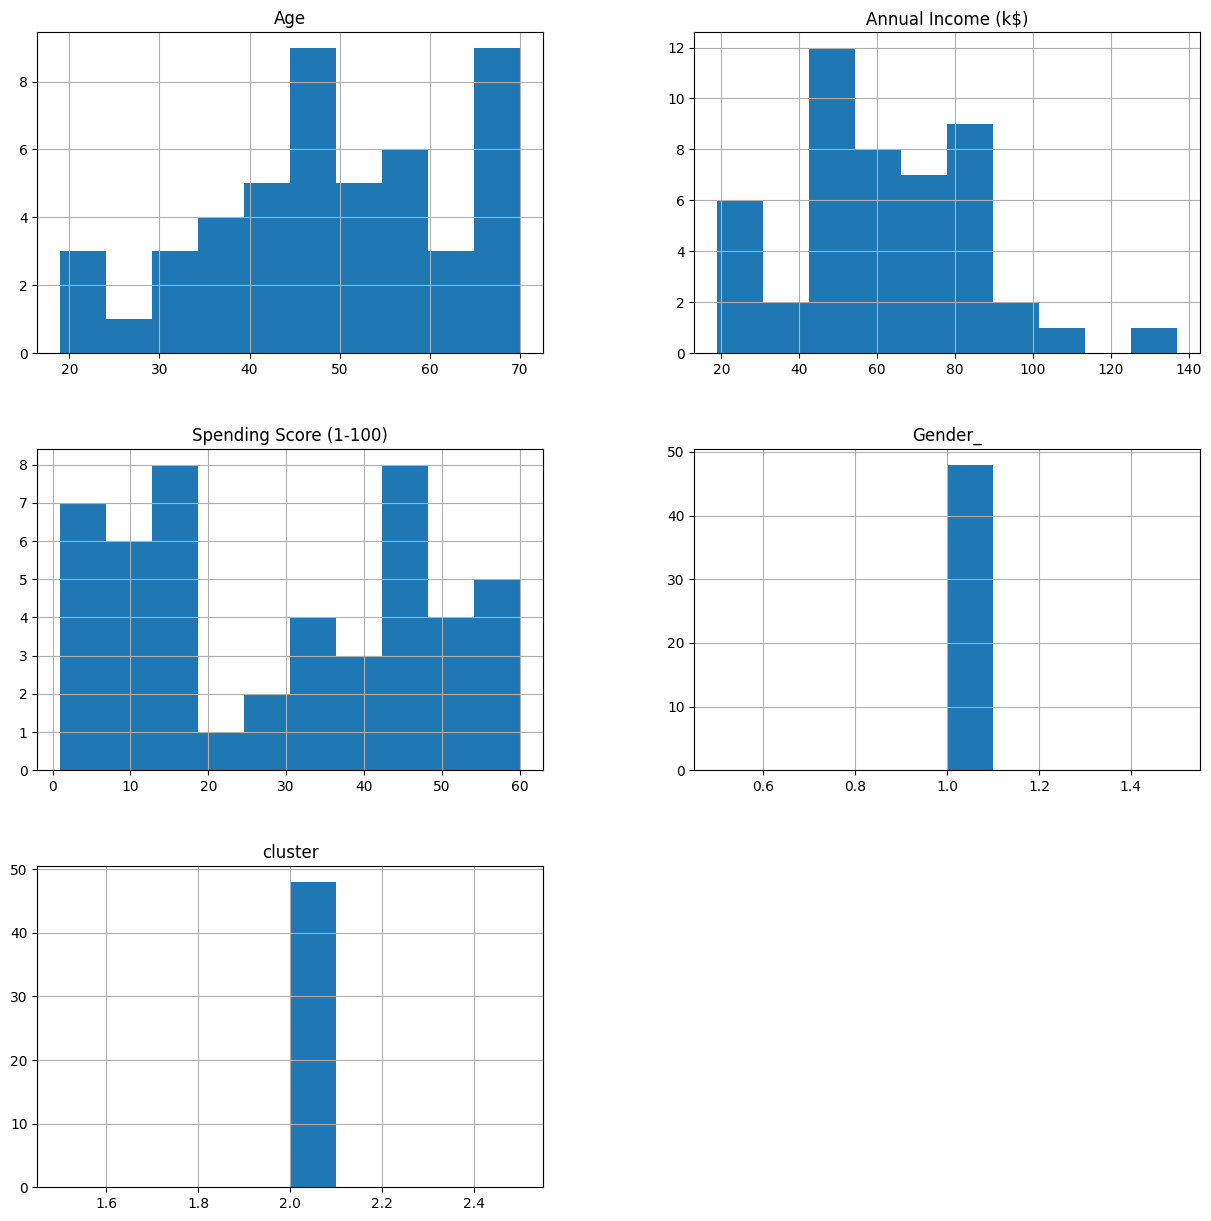

In [ ]:
result_df[result_df['cluster'] == 2].hist(figsize = (15,15));

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Age,57.0,28.438596,5.493560,18.0,23.0,30.0,32.0,40.0
Annual Income (k$),57.0,59.666667,26.463812,16.0,39.0,62.0,78.0,120.0
Spending Score (1-100),57.0,67.684211,18.712255,29.0,51.0,73.0,83.0,99.0
Gender_,57.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cluster,57.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


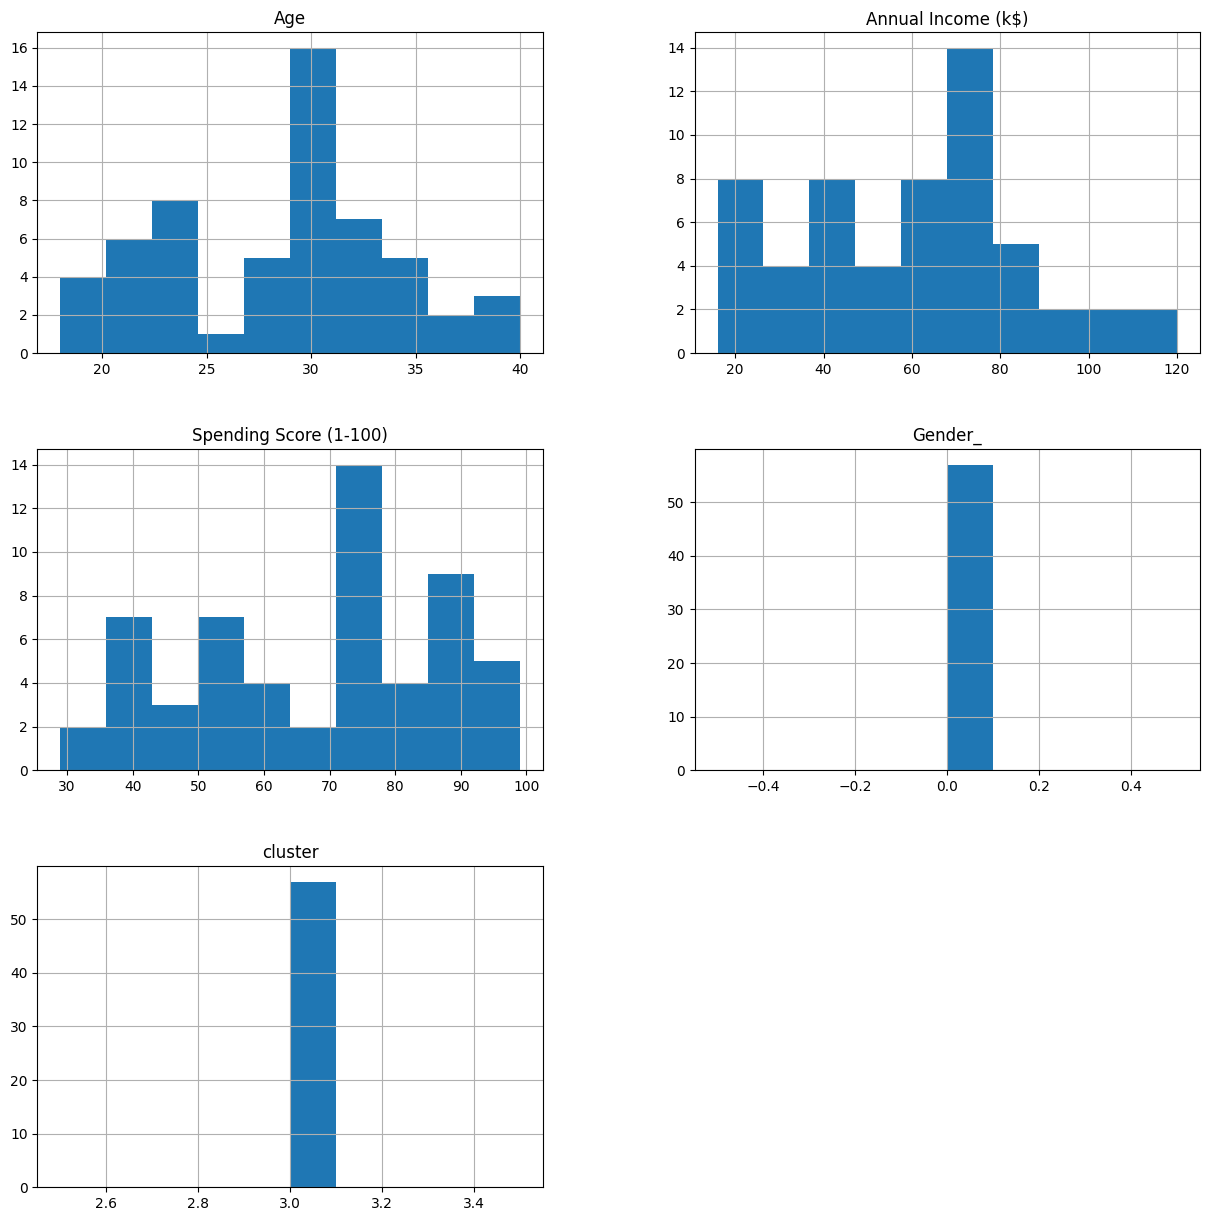

In [ ]:
result_df[result_df['cluster'] == 3].hist(figsize = (15,15));